In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#definitions
amino_acids = ['alanine', 
       'arginine', 'aspartic_acid', 'cystine', 'glutamic_acid', 'glycine',
       'histidine', 'hydroxyproline', 'isoleucine', 'leucine', 'lysine',
       'methionine', 'phenylalanine', 'proline', 'serine', 'threonine',
       'tryptophan', 'tyrosine', 'valine',]
print(len(amino_acids))
# misiing aspargine, glutamine

19


Amino acid assays measure glutamine and aspargine as glutamic acid and aspartic acid, in other words the glutamic acid column is actually glutamine + glutamic acid.

Nine amino acids—histidine, isoleucine, leucine, lysine, methionine, phenylalanine, threonine, tryptophan, and valine—are not synthesized by mammals and are therefore dietarily essential or indispensable nutrients.

Digestibility also affects amino acid uptake from foods. Food amino acids range from 60 - 100% digestible. 

In [15]:
df = pd.read_csv('../data/nutrition.csv').drop(['Unnamed: 0', 'serving_size'], axis=1)
# use the name as the index 
df = df.drop('lucopene', axis=1)
df = df.drop('fatty_acids_total_trans', axis=1)
df = df.drop('tocopherol_alpha', axis=1)

#Foods to be removed
current_names = df['name']
flags = ['babyfood', 'infant','dried','beverage','leavening','stevia','toddler']
remove = [idx for idx in range(len(df)) if any([label in current_names.iloc[idx].lower() for label in flags])]
df = df.drop(remove,axis=0)

# names = df['name']
# df = df.drop('name', axis=1)
# name_to_idx = {v: k for k, v in names.to_dict().items()}

In [12]:
mask = df['name'].str.contains('nuts')
for food in ['tomato','avocado','yoghurt','milk','potato','lamb',
             'celery','cheese','fish','beans','banana','lemon','onion',
             'garlic','chicken','bread','cereal','beef','lettuce',
            'cucumber','egg','turkey']:
    mask = mask | df['name'].str.contains(food)

In [13]:
df = df[mask]
names = df['name']
df = df.drop('name', axis=1)
name_to_idx = {v: k for k, v in names.to_dict().items()}

In [14]:
names

16                                 Pie, lemon, fried pies
19                                 Salami, turkey, cooked
21                                 Nuts, raw, ginkgo nuts
40                                 Gravy, mix, dry, onion
60                                  Ground turkey, cooked
                              ...                        
8538    Turkey sausage, cooked (include BUTTERBALL bre...
8560    Rice bowl with chicken, prepared (includes fri...
8644    Spanish rice mix, prepared (with canola/vegeta...
8731    Fast foods, regular patty; double decker bun w...
8750    MORNINGSTAR FARMS Breakfast Sandwich Veggie Sa...
Name: name, Length: 1189, dtype: object

In [4]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.']

def get_unit(x):
    if isinstance(x, str):
        for char in range(len(x)):
            if x[char] not in numbers:
                return x[char:]
    else: 
        return x

def delete_unit(x):
    if isinstance(x, str):
        for char in range(len(x)):
            if x[char] not in numbers:
                return float(x[0:char:1])
        return float(x)
    else:
        return float(0)

In [5]:
units = df.iloc[1].apply(get_unit).to_dict()
units['calories'] = 'kcal'
units['hydroxyproline'] = 'g'
units['galactose'] = 'g'
units['cholesterol'] = 'mg'

cols_with_unit = df.columns.drop(['calories'])
for col in df[cols_with_unit]:
    df[col] = df[col].apply(delete_unit)
df.head()

ValueError: could not convert string to float: ''

In [67]:
complete = df[(df['protein'] > 0) * (df[amino_acids].sum(axis=1) > 0)][['protein']+amino_acids]

amino_median = []
for idx in range(len(amino_acids)):
    ratio = complete[[amino_acids[idx]]].sum(axis=1) / complete['protein']
    amino_median.append(ratio.median())
amino_median = 0.9 * np.array(amino_median)

mask = (df['protein'] > 0) * (df[amino_acids].sum(axis=1) == 0)
fix = df[mask][['protein']].values * amino_median
for idx in range(len(amino_acids)):
    df[amino_acids[idx]][mask] = fix[:,idx]

/var/folders/pj/mh9s37yn0r90tmd44r3slss00000gn/T/ipykernel_28289/4121910711.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[amino_acids[idx]][mask] = fix[:,idx]


In [8]:
df.describe()

,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,...,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,alcohol,ash,caffeine,theobromine,water
count,1189.000000,1189.000000,1189.000000,1189.00000,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.00000,...,1189.000000,1189.000000,1189.000000,1189.000000,1189.000000,1189.0,1189.000000,1189.000000,1189.000000,1189.000000
mean,231.903280,11.594701,3.369554,28.64508,527.531539,18.654415,39.995795,11.713204,2.655678,0.42613,...,0.469899,11.584828,3.369747,4.421496,2.550116,0.0,2.261884,1.555929,2.821699,53.397939
std,163.763513,14.637707,5.075379,52.39397,1498.937023,29.142207,77.017855,34.362682,3.034824,0.56869,...,2.350745,14.624214,5.069425,7.208251,4.413667,0.0,3.465772,33.629637,20.226375,29.310566
min,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,100.000000,1.700000,0.400000,0.00000,78.000000,0.000000,4.000000,0.000000,0.500000,0.04300,...,0.000000,1.710000,0.409000,0.412000,0.233000,0.0,1.120000,0.000000,0.000000,33.870000
50%,206.000000,6.500000,1.800000,8.00000,364.000000,3.800000,14.000000,0.000000,1.700000,0.31600,...,0.000000,6.510000,1.832000,1.924000,1.063000,0.0,1.780000,0.000000,0.000000,59.550000
75%,324.000000,16.000000,4.600000,43.00000,619.000000,28.100000,51.000000,0.000000,3.758000,0.59200,...,0.000000,16.230000,4.601000,5.601000,3.016000,0.0,2.740000,0.000000,0.000000,76.100000
max,902.000000,100.000000,86.000000,933.00000,26000.000000,247.500000,1427.000000,422.000000,25.700000,10.10000,...,42.310000,100.000000,86.002000,70.554000,53.100000,0.0,59.300000,839.000000,368.000000,98.690000


In [9]:
p_ratio = df['protein'] / df['calories']
p_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
p_ratio = p_ratio.dropna().sort_values(ascending=False)

Text(0.5, 0, 'Grams of Protein per calory')

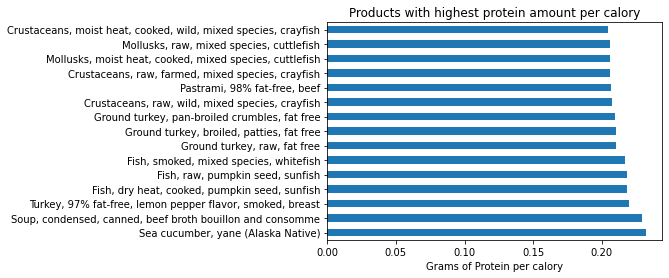

In [10]:
fig, ax1 = plt.subplots()
p_ratio.head(15).plot.barh(title='Products with highest protein amount per calory', ax=ax1)
ax1.set_yticklabels(names[p_ratio.head(15).index].values)
ax1.set_xlabel('Grams of Protein per calory')

In [11]:
f_ratio = df['total_fat'] / df['calories']
f_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)
f_ratio = f_ratio.dropna().sort_values(ascending=False)

Text(0.5, 0, 'Grams of Fat per calory')

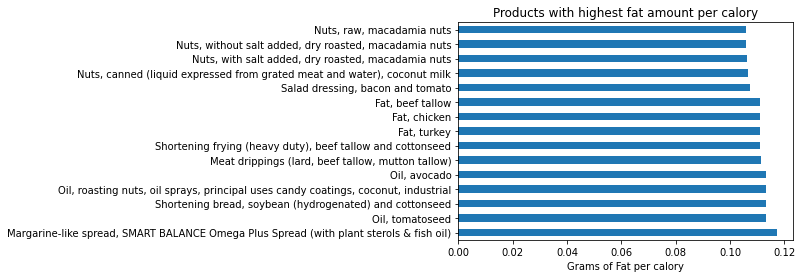

In [12]:
fig, ax1 = plt.subplots()
f_ratio.head(15).plot.barh(title='Products with highest fat amount per calory', ax=ax1)
ax1.set_yticklabels(names[f_ratio.head(15).index].values)
ax1.set_xlabel('Grams of Fat per calory')

All makes sense.

In [37]:
#Save cleaned data
df.to_csv('../data/nutrition_clean.csv', index=False)
names.to_csv('../data/food_names.csv', index=False)

In [13]:
#Save cleaned data subset
df.to_csv('../data/nutrition_clean_subset.csv', index=False)
names.to_csv('../data/food_names_subset.csv', index=False)

In [39]:
import json
with open('../data/units.json', "w") as outfile:
    json.dump(units, outfile)

In [27]:
!python ../main.py --n_sweep 3

50 < total_fat (g) < 120
10 < saturated_fat (g) < 25
50 < cholesterol (mg) < 250
1500 < sodium (mg) < 3000
550 < choline (mg) < 2500
400 < folate (mcg) < 900
16 < niacin (mg) < 30
5 < pantothenic_acid (mg) < 100
1.3 < riboflavin (mg) < 500
1.2 < thiamin (mg) < 200
3000 < vitamin_a (IU) < 8000
2.4 < vitamin_b12 (mcg) < 8
1.3 < vitamin_b6 (mg) < 4
90 < vitamin_c (mg) < 1000
600 < vitamin_d (IU) < 5000
15 < vitamin_e (mg) < 500
120 < vitamin_k (mcg) < 500
1300 < calcium (mg) < 2000
0.9 < copper (mg) < 7
8 < irom (mg) < 35
400 < magnesium (mg) < 500
2.3 < manganese (mg) < 7
700 < phosphorous (mg) < 3500
4700 < potassium (mg) < 7000
55 < selenium (mcg) < 300
11 < zink (mg) < 35
70 < protein (g) < 100
0.287 < cystine (g) < inf
0.7 < histidine (g) < inf
1.4 < isoleucine (g) < inf
2.73 < leucine (g) < inf
2.1 < lysine (g) < inf
0.728 < methionine (g) < inf
0.875 < phenylalanine (g) < inf
1.05 < threonine (g) < inf
0.28 < tryptophan (g) < inf
0.875 < tyrosine (g) < inf
1.82 < valine (g) < inf
1